In [1]:
!pip install opencv-contrib-python
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf

In [2]:
dataset_path = "/Users/brijesh/Desktop/AI_DermalScan/data/raw"  # Folder containing 4 class folders

# to get all class folders
classes = [f for f in os.listdir(dataset_path) 
           if os.path.isdir(os.path.join(dataset_path, f))]

#count images in each class and store in pandas DataFrame
data = []
for c in classes:
    folder = os.path.join(dataset_path, c)
    num_images = len([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    data.append({'Class': c, 'Count': num_images})

df = pd.DataFrame(data)

In [3]:
df

,Class,Count
0,clear skin,300
1,dark spots,303
2,wrinkles,300
3,puffy eyes,300


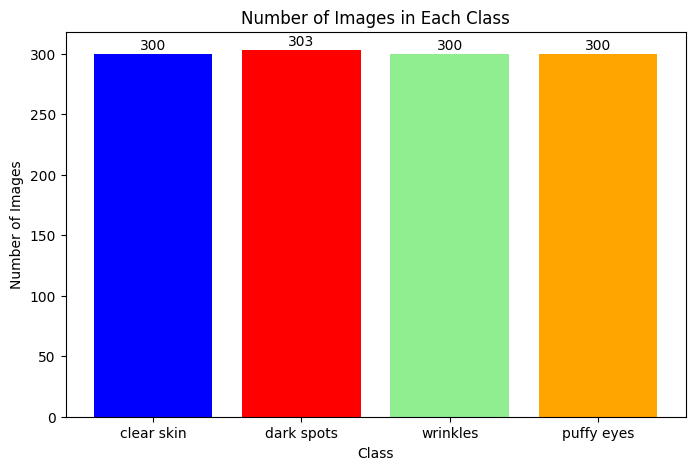

In [4]:
plt.figure(figsize=(8,5))
plt.bar(df['Class'], df['Count'], color=['blue', 'red', 'lightgreen', 'orange'])
plt.title("Number of Images in Each Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")

#count labels on top of bars
for i, count in enumerate(df['Count']):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

In [5]:
def process_image(img_path,target_size=(224, 224)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype("float32") / 255.0  # normalize
    return img

In [6]:
img = process_image("/Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_002.jpg")

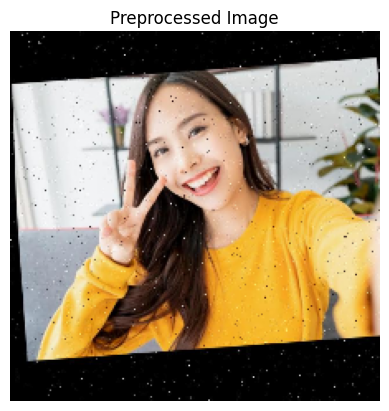

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title("Preprocessed Image")
plt.axis("off")
plt.show()

In [8]:
img.shape

(224, 224, 3)

In [9]:
img[:2, :2]  # prints first 2×2 pixels

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [10]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.2)
])

In [11]:
def augment_image(img_path, num_aug=3):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img.astype("float32") / 255.0

    img_batch = tf.expand_dims(img, 0)

    augmented_images = []
    for i in range(num_aug):
        aug = data_augmentation(img_batch, training=True)
        aug = tf.squeeze(aug).numpy()
        augmented_images.append(aug)

    return img, augmented_images


In [12]:
def show_augmentation_multiple(image_paths, num_aug=3):

    # split by comma
    paths = [p.strip() for p in image_paths.split(",")]

    for img_path in paths:
        print(f"\nProcessing: {img_path}\n")

        original, augmented_list = augment_image(img_path, num_aug)

        plt.figure(figsize=(15, 5))

        # Show original
        plt.subplot(1, num_aug + 1, 1)
        plt.imshow(original)
        plt.axis("off")
        plt.title("Original")

        # Show augmentations
        for i, aug in enumerate(augmented_list):
            plt.subplot(1, num_aug + 1, i + 2)
            plt.imshow(aug)
            plt.axis("off")
            plt.title(f"Augmented {i+1}")

        plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0330652].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0387368].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0803685].



Processing: /Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_002.jpg



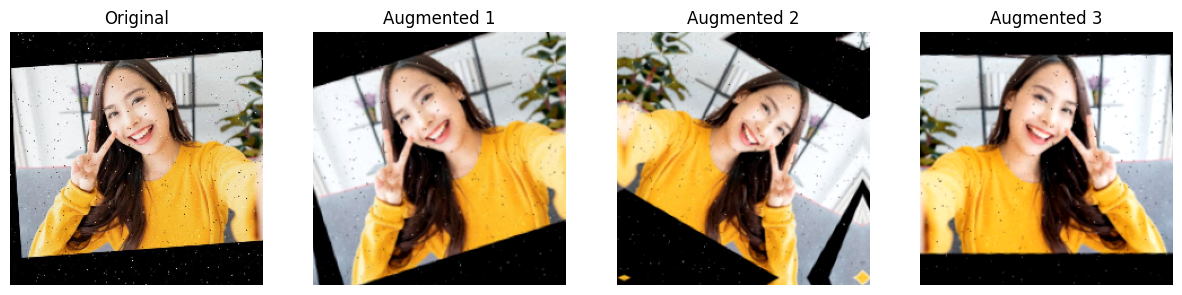

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0071921].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0085015].



Processing: /Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_003.jpg



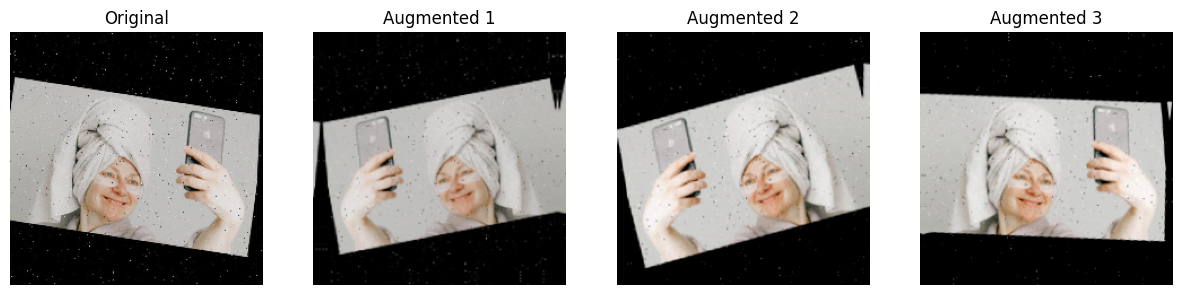

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.016382575..1.0021108].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0265526].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00181669..1.0041103].



Processing: /Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_004.jpg



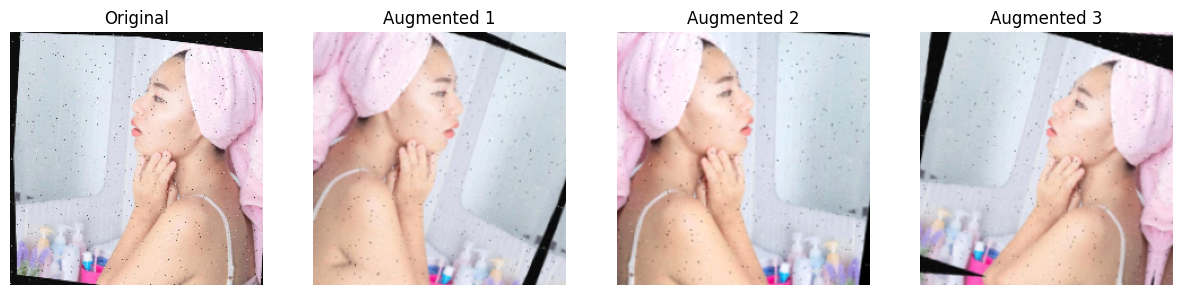

In [13]:
show_augmentation_multiple(
    "/Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_002.jpg, "
    "/Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_003.jpg, "
    "/Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_004.jpg",
    num_aug=3
)

In [14]:
def load_dataset(path, img_size=224, batch_size=32):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        path,
        image_size=(img_size, img_size),
        label_mode="categorical",  # one-hot encoding
        shuffle=True
    )

    # Normalize images
    normalization = tf.keras.layers.Rescaling(1.0 / 255)
    dataset = dataset.map(lambda x, y: (normalization(x), y))
    return dataset


In [15]:
# Load dataset
train_data = load_dataset("/Users/brijesh/Desktop/AI_DermalScan/data/raw", img_size=224, batch_size=1)  #batchsize=1 to see the labels clearly

# Print one-hot labels for each image
for images, labels in train_data.take(10):  # take first 10 images
    print(labels.numpy())

Found 1203 files belonging to 4 classes.
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.

2025-12-07 08:51:04.459696: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [17]:
def split_dataset(raw_dir, out_dir="data",
                  train_ratio=0.7, val_ratio=0.15, seed=42):

    # Get only folders
    classes = [
        d for d in os.listdir(raw_dir)
        if os.path.isdir(os.path.join(raw_dir, d))
    ]

    #Create train, val, test folders
    for split in ["train", "val", "test"]:
        for cls in classes:
            os.makedirs(os.path.join(out_dir, split, cls), exist_ok=True)

    
    for cls in classes:
        class_path = os.path.join(raw_dir, cls)

        # Get image files only
        images = [
            os.path.join(class_path, f)
            for f in os.listdir(class_path)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        ]

        # Split images
        train_val, test = train_test_split(
            images, test_size=1 - (train_ratio + val_ratio),
            random_state=seed, shuffle=True
        )

        train, val = train_test_split(
            train_val,
            test_size=val_ratio / (train_ratio + val_ratio),
            random_state=seed, shuffle=True
        )

        #Copy files to new folders
        for f in train:
            shutil.copy(f, os.path.join(out_dir, "train", cls))

        for f in val:
            shutil.copy(f, os.path.join(out_dir, "val", cls))

        for f in test:
            shutil.copy(f, os.path.join(out_dir, "test", cls))

    print("Dataset successfully split into Train, Val, and Test")


In [18]:
split_dataset("/Users/brijesh/Desktop/AI_DermalScan/data/raw",
              out_dir="/Users/brijesh/Desktop/AI_DermalScan/data")


Dataset successfully split into Train, Val, and Test


In [19]:
import os
import pandas as pd

def count_split_images(base_dir):
    splits = ["train", "val", "test"]
    data = []

    for split in splits:
        split_path = os.path.join(base_dir, split)

        # All class folders
        classes = [
            c for c in os.listdir(split_path)
            if os.path.isdir(os.path.join(split_path, c))
        ]

        for cls in classes:
            class_path = os.path.join(split_path, cls)

            num_images = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith((".jpg", ".jpeg", ".png"))
            ])

            data.append([split, cls, num_images])

    df = pd.DataFrame(data, columns=["Split", "Class", "Count"])
    return df


In [20]:
df_counts = count_split_images("/Users/brijesh/Desktop/AI_DermalScan/data")
print(df_counts)


    Split       Class  Count
0   train   .DS_Store      0
1   train  clear skin    209
2   train  dark spots    211
3   train    wrinkles    209
4   train  puffy eyes    209
5     val   .DS_Store      0
6     val  clear skin     45
7     val  dark spots     46
8     val    wrinkles     45
9     val  puffy eyes     45
10   test   .DS_Store      0
11   test  clear skin     46
12   test  dark spots     46
13   test    wrinkles     46
14   test  puffy eyes     46


In [21]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_grouped_bar(df):
    # Remove DS_Store rows
    df = df[df["Class"] != ".DS_Store"]

    # Pivot for grouped chart
    pivot_df = df.pivot(index="Class", columns="Split", values="Count")

    # Plot
    pivot_df.plot(kind="bar", figsize=(10, 7))

    plt.title("Image Count per Class in Each Split")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


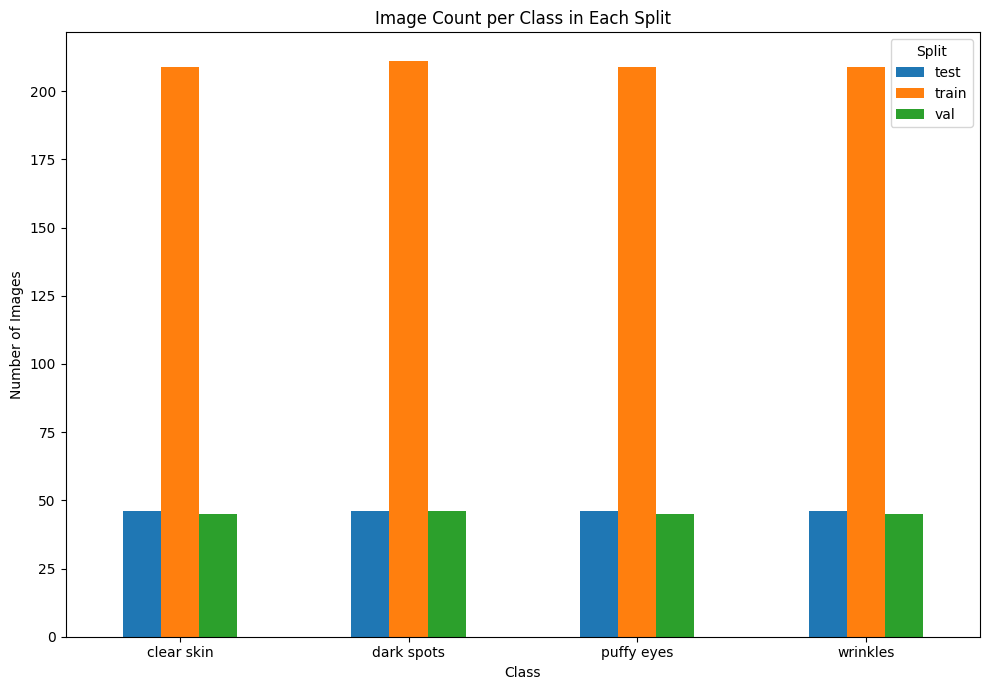

In [22]:
plot_grouped_bar(df_counts)
